After tt

In [1]:
import pandas as pd
import numpy 
dataset_e1= pd.read_csv("./stand_norm_e1.txt",delimiter=" ",header=None)
dataset_e1=numpy.array(dataset_e1,float)

X_e1 = dataset_e1[:,:8]
#m=np.max(X_e1)

print(X_e1.shape)



(13762, 8)


array([[1.93978268e+02, 9.89658300e+00, 2.02883500e+01, ...,
        1.23907620e+02, 6.62235000e-01, 9.66716000e-01],
       [8.21718810e+01, 1.85822300e+00, 1.79525440e+01, ...,
        1.70642080e+01, 6.49830000e-01, 1.72596200e+00],
       [3.26893179e+03, 6.52433300e+00, 1.85320570e+01, ...,
        1.00173500e+03, 6.37607000e-01, 3.63161000e-01],
       ...,
       [1.93845034e+02, 4.31289000e-01, 7.66381500e+00, ...,
        1.48119304e+02, 1.11113900e+00, 7.66170000e-01],
       [5.37608964e+02, 1.15022900e+00, 1.45061190e+01, ...,
        1.80209238e+02, 1.11802400e+00, 6.40931000e-01],
       [1.53551504e+02, 4.51115000e-01, 6.77274800e+00, ...,
        9.98209850e+01, 1.12499300e+00, 4.70517000e-01]])

In [2]:
dataset_e2= pd.read_csv("./stand_norm_e2.txt",delimiter=" ",header=None)
dataset_e2=numpy.array(dataset_e2,float)

X_e2 = dataset_e2[:,:8]
#n=np.max(X_e2)
#X_e2=X_e2/n
print(X_e2.shape)


(13762, 8)


In [3]:
x_train_test=numpy.zeros((X_e1.shape[0],X_e1.shape[1],2))
x_train_test[:,:,0]=X_e1
x_train_test[:,:,1]=X_e2
print(x_train_test.shape)
#print(x_test.shape)



(13762, 8, 2)


array([[193.978268, 163.21552 ],
       [  9.896583,   9.042817],
       [ 20.28835 ,  17.174985],
       [  6.80433 ,  16.798999],
       [ 13.081385,  17.999821],
       [123.90762 ,  62.198898],
       [  0.662235,   0.662235],
       [  0.966716,   1.030338]])

In [4]:
dataset_output= pd.read_csv("./y2_e1.txt",delimiter=" ",header=None)
dataset_output=numpy.array(dataset_output,float)
dataset_output_new= dataset_output.reshape(dataset_output.shape[0], )


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_test, dataset_output_new, test_size=0.15, random_state=42)
x_train_new=x_train
x_test_new=x_test
print(x_train_new.shape)
print(y_train.shape)
import tensorflow
Y_train_new = tensorflow.keras.utils.to_categorical( y_train)
Y_test_new = tensorflow.keras.utils.to_categorical(y_test)
print(Y_train_new.shape)
print (x_train_new.shape)
x_train_new=x_train_new.reshape(x_train_new.shape[0],  x_train_new.shape[1], 2)
x_test_new = x_test_new.reshape(x_test_new.shape[0], x_test_new.shape[1],2 )
print (x_train_new.shape)





(11697, 8, 2)
(11697,)
(11697, 3)
(11697, 8, 2)
(11697, 8, 2)


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [6]:


import numpy as np 
import pandas as pd 

from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling1D , Dropout ,BatchNormalization ,GRU ,Bidirectional
from keras.layers import Flatten
from keras.layers import Dense
from PIL import Image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from keras.layers import LSTM


In [16]:
model = Sequential()
model.add(LSTM(1024,return_sequences=True,input_shape=(8,2)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(1024, activation='relu'))) #elu
model.add(Dropout(0.5))
#model.add(Bidirectional(LSTM(500, dropout=0.5)))
model.add(BatchNormalization(momentum=0.6))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 8, 1024)           4206592   
                                                                 
 dropout_1 (Dropout)         (None, 8, 1024)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 2048)             16785408  
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dropout_3 (Dropout)         (None, 2048)             

In [ ]:
checkpointer = ModelCheckpoint(filepath='./'+'_best_weights.h5', verbose=1, monitor='val_loss', mode='auto', save_best_only=True) #save at each epoch if the validation decreased

history =model.fit(x_train_new, Y_train_new, epochs=50, batch_size=512, verbose=1, validation_split=0.2, callbacks=[checkpointer])

model.save('weights_BiLSTM2.h5')

In [195]:
score = model.evaluate(x_test_new, Y_test_new, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

65/65 [==============================] - 1s 12ms/step - loss: 0.2971 - accuracy: 0.8203
Test loss: 0.29708006978034973
Test accuracy: 0.8203389644622803


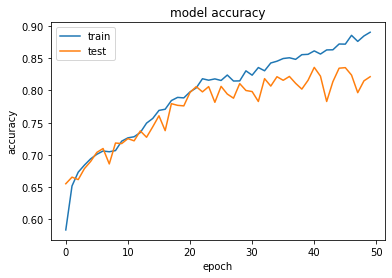

In [196]:
import matplotlib.pyplot as plt # shorcut for a plot function
plt.plot(history.history['accuracy']) # training accuracy
plt.plot(history.history['val_accuracy']) # validation accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

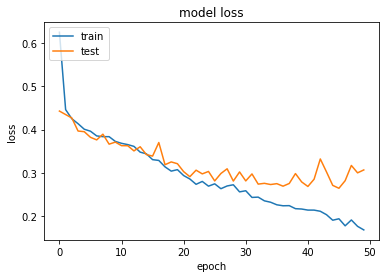

In [197]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [198]:
predictions = model.predict(x_test_new, batch_size=32, verbose=2)
print ("predicted images size :",predictions.shape)
print(predictions)
print(Y_test_new.shape)

65/65 - 1s - 1s/epoch - 19ms/step
predicted images size : (2065, 3)
[[1.0000000e+00 2.0928071e-15 6.0455353e-23]
 [9.9900371e-01 9.5118087e-04 4.5182271e-05]
 [9.9971455e-01 2.8537912e-04 1.1846545e-08]
 ...
 [1.0000000e+00 3.6575662e-09 1.2782173e-11]
 [2.5697182e-06 9.9999738e-01 1.1594331e-08]
 [1.0000000e+00 6.7517270e-10 4.7873417e-15]]
(2065, 3)


In [199]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((predictions.shape[0]))
y_test = np.empty((predictions.shape[0]))
for i in range(predictions.shape[0]):
    
    y_pred[i]=np.argmax(predictions[i])
    y_test[i]=np.argmax(Y_test_new[i])
#print(y_pred)
    
       
confusion = confusion_matrix(y_test,  y_pred)
print (confusion)


Confusion matrix:  Custom threshold (for positive) of 0.5
[[742 235   3]
 [124 928   4]
 [  3   2  24]]


In [200]:
print("The accuracy score on this random test-set is  :", accuracy_score(y_test,  y_pred) )
recall=recall_score(y_test,  y_pred, average=None)
av_recall=sum(recall)/3
print("recall",recall, "the avreage recall is ",av_recall)
precision=precision_score(y_test,  y_pred,average=None)
av_precision=sum(precision)/3

print("precision",precision,"the avreage precision is ",av_precision)

F1_score=(2*av_precision*av_recall)/(av_precision+av_recall)
print("F1_score",F1_score)

The accuracy score on this random test-set is  : 0.8203389830508474
recall [0.75714286 0.87878788 0.82758621] the avreage recall is  0.8211723142757625
precision [0.85385501 0.79656652 0.77419355] the avreage precision is  0.808205025915329
F1_score 0.8146370704558321
